## DATA COLLECTION

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=sns.load_dataset('tips')
x=df['total_bill']
y=df['tip']
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## UNDERSTANDING THE DATASET

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## RELATIONSHIP CHECK

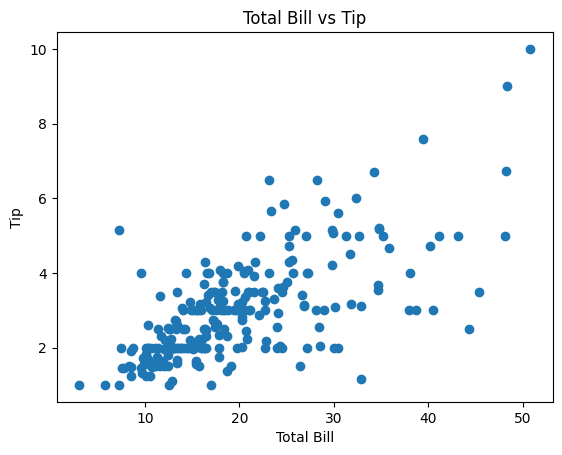

In [4]:
plt.scatter(x,y)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

## FEATURE AND TARGET SEPARATION

In [5]:
x=df[['total_bill']]#must be 2d
y=df['tip']#can be 1d


## TRAIN TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #text_size=0.2 means 20% data for testing and 80% for training

### FEATURE STANDARDIZATION

1.Compare the Co-efficients fairly
2.Avoid the Dominance of large values
3.prepare for Ridge/Lasso

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
# print(x_train_scaled)
# print(x_test_scaled)



### TRAIN LINEAR REGRESSION MODAL

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Coefficient:",model.coef_[0])
print("Intercept:",model.intercept_)
y_pred=model.predict(x_test_scaled)
print("Predicted values:",y_pred)


Coefficient: 0.9357171400271826
Intercept: 3.0877948717948724
Predicted values: [3.04525623 1.86330727 3.55119456 3.69452593 2.31576375 2.83881627
 3.96728338 2.26014262 2.50615915 2.57033737 2.88160176 2.07723468
 2.06439904 2.47407003 2.00236009 2.91903905 2.92652651 3.23351235
 2.68478854 5.33107064 3.13831465 3.13403611 2.4558862  1.94673896
 3.16077703 2.17564129 2.02375283 3.62927807 2.68906708 6.07767732
 4.99734388 1.75313465 2.83025918 3.09552917 2.74040966 3.50092162
 2.21200895 5.53644096 2.33287794 3.35010279 2.04942412 2.47834858
 3.48701634 2.03017065 2.03124029 1.25361414 2.05798121 2.92438724
 1.73388118]


## MODEL EVALUATION

In [9]:
# Accuracy Calculation
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

R2 Score: 0.5449381659234664


In [10]:
# Error Calculation
from sklearn.metrics import mean_squared_error
import  numpy as np 
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 0.5688142529229538
Root Mean Squared Error: 0.7541977545199626


## VISUALIZE THE BEST FIT LINE

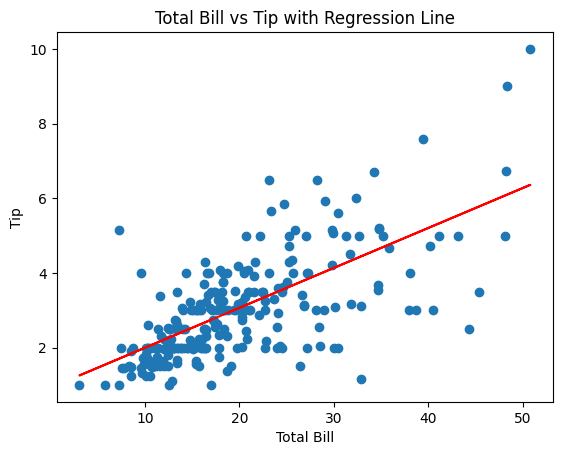

In [11]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip with Regression Line')
plt.show()

### INPUT-OUTPUT REAL TIME

In [12]:
bill_amount=float(input("Enter the total bill amount: "))
scaled_bill_amount=scaler.transform([[bill_amount]])
tip_amount=model.predict(scaled_bill_amount)
print("Predicted tip amount:",tip_amount[0])

ValueError: could not convert string to float: ''